In [1]:
# DSC680
# Weeks 5-8
# Term Project 2
# Author: Nathanael Ochoa
# 01/26/25

# Term Project 2

In [41]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
# Import data
data = pd.read_csv('Ochoa680ProjectData/cardio_train.csv', delimiter = ';', header = 0)

In [4]:
# Data shape
data.shape

(70000, 13)

In [5]:
# Preview
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# Check for null values
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Exploratory Data Analysis (EDA)

In [7]:
# Overview of numeric features
data.describe(include = 'all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


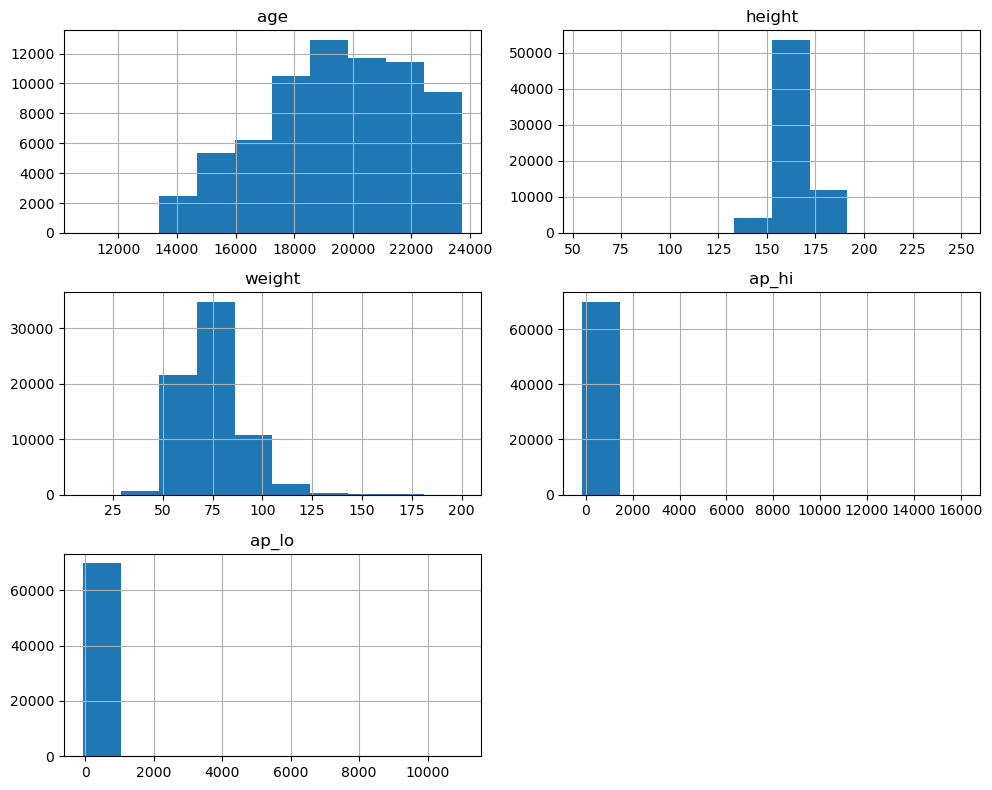

In [16]:
# Distributions of numeric features
data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(figsize = (10, 8))

# Save the plot as an image
plt.savefig('distributions.png', dpi = 300)

plt.tight_layout()
plt.show()

### Box Plots for Numeric Feature Relationships

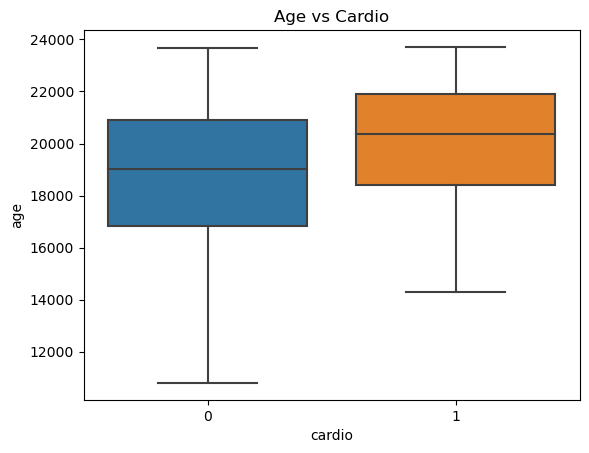

In [18]:
# Explore relationships between numeric features and the target (cardio)
sns.boxplot(x = 'cardio', y = 'age', data = data)

# Title
plt.title("Age vs Cardio")

# Save the plot as an image
plt.savefig('age boxplot.png', dpi = 300)

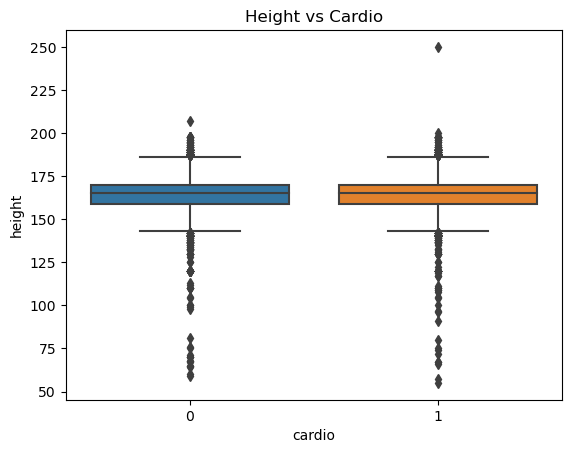

In [21]:
# Explore relationships between numeric features and the target (cardio)
sns.boxplot(x = 'cardio', y = 'height', data = data)

# Title
plt.title("Height vs Cardio")

# Save the plot as an image
plt.savefig('height boxplot.png', dpi = 300)

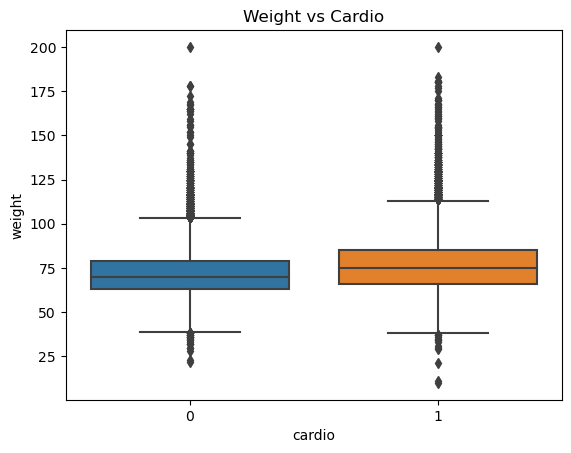

In [22]:
# Explore relationships between numeric features and the target (cardio)
sns.boxplot(x = 'cardio', y = 'weight', data = data)

# Title
plt.title("Weight vs Cardio")

# Save the plot as an image
plt.savefig('weight boxplot.png', dpi = 300)

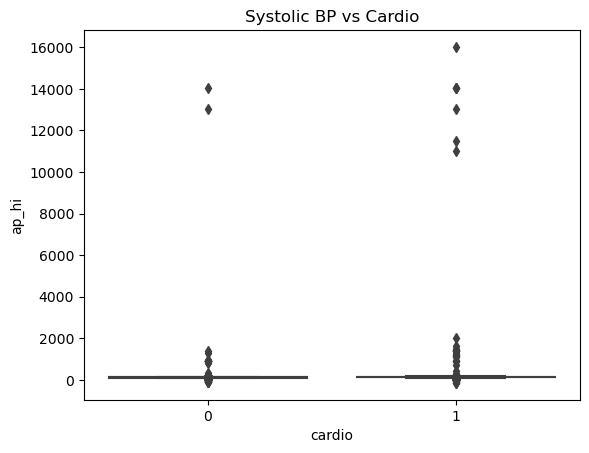

In [24]:
# Explore relationships between numeric features and the target (cardio)
sns.boxplot(x = 'cardio', y = 'ap_hi', data = data)

# Title
plt.title("Systolic BP vs Cardio")

# Save the plot as an image
plt.savefig('systolic blood pressure boxplot.png', dpi = 300)

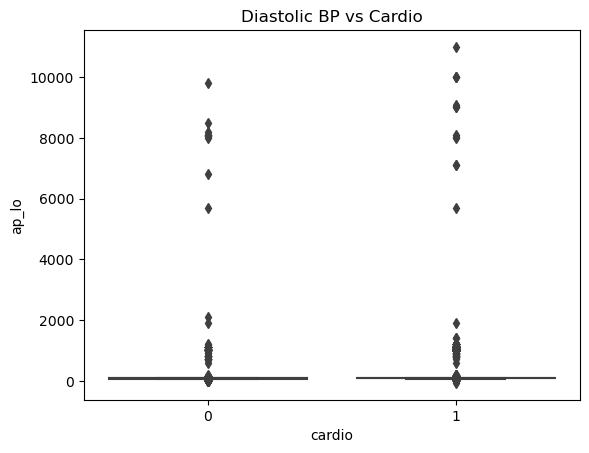

In [25]:
# Explore relationships between numeric features and the target (cardio)
sns.boxplot(x = 'cardio', y = 'ap_lo', data = data)

# Title
plt.title("Diastolic BP vs Cardio")

# Save the plot as an image
plt.savefig('diastolic blood pressure boxplot.png', dpi = 300)

There are some outliers in the data, and it also seems that there is more variability in the data for those with cardiovascular disease (cardio = 1). However, overall, both groups are not too different and fall within similar ranges.

## Correlation Analysis

In [28]:
# Compute Pearson correlations between numeric variables and target (cardio)
corr_matrix = data.corr()
print(corr_matrix['cardio'].sort_values(ascending = False))

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


The key takeaway from the Pearson correlations is that age and cholesterol have the strongest positive correlations with cardiovascular disease (cardio), with moderate relationships suggesting they are key predictors. Other variables, such as weight, glucose, and blood pressure, show weak correlations, indicating they may have limited predictive power in their current form. Features like gender, alcohol intake, height, smoking, and physical activity have almost negligible correlations, suggesting they have little to no linear relationship with the target variable.

### Chi-Square Test for the following categorical variables: gender, cholesterol, gluc, smoke, alco, active.

In [30]:
# Chi-Square test for gender v cardio
contingency_gend = pd.crosstab(data['gender'], data['cardio'])
chi2_gend, p_gend, dof_gend, ex_gend = chi2_contingency(contingency_gend)
print(f'Chi-square p-value for gender: {p_gend}')

Chi-square p-value for gender: 0.03254570031936317


In [31]:
# Chi-Square test for cholesterol v cardio
contingency_chol = pd.crosstab(data['cholesterol'], data['cardio'])
chi2_chol, p_chol, dof_chol, ex_chol = chi2_contingency(contingency_chol)
print(f'Chi-square p-value for cholesterol: {p_chol}')

Chi-square p-value for cholesterol: 0.0


In [32]:
# Chi-Square test for gluc v cardio
contingency_gluc = pd.crosstab(data['gluc'], data['cardio'])
chi2_gluc, p_gluc, dof_gluc, ex_gluc = chi2_contingency(contingency_gluc)
print(f'Chi-square p-value for gluc: {p_gluc}')

Chi-square p-value for gluc: 3.5786568357289105e-128


In [33]:
# Chi-Square test for smoke v cardio
contingency_smok = pd.crosstab(data['smoke'], data['cardio'])
chi2_smok, p_smok, dof_smok, ex_smok = chi2_contingency(contingency_smok)
print(f'Chi-square p-value for smoke: {p_smok}')

Chi-square p-value for smoke: 4.4293623605077656e-05


In [34]:
# Chi-Square test for alco v cardio
contingency_alco = pd.crosstab(data['alco'], data['cardio'])
chi2_alco, p_alco, dof_alco, ex_alco = chi2_contingency(contingency_alco)
print(f'Chi-square p-value for alco: {p_alco}')

Chi-square p-value for alco: 0.05452518218322108


In [35]:
# Chi-Square test for active v cardio
contingency_acti = pd.crosstab(data['active'], data['cardio'])
chi2_acti, p_acti, dof_acti, ex_acti = chi2_contingency(contingency_acti)
print(f'Chi-square p-value for active: {p_acti}')

Chi-square p-value for active: 4.3651927285329286e-21


* Significant predictors (p-value < 0.05): Gender, Cholesterol, Glucose, Smoking, and Physical Activity.
* Marginally non-significant predictor (p-value ≈ 0.05): Alcohol intake.

The p-values for cholesterol, glucose, smoking, and physical activity indicate these are strong predictors of cardiovascular disease, while gender also shows a significant, though potentially weaker, association. Alcohol intake is on the borderline of being significant but might not be as strongly related to the target.

### Point-Biserial correlation for the following binary variables: smoke, alco, active.

In [37]:
# Point-biserial correlation for smoke vs. cardio
corr_smoke, p_smoke = pointbiserialr(data['smoke'], data['cardio'])
print(f'Point-biserial correlation for smoke: {corr_smoke}, p-value: {p_smoke}')

Point-biserial correlation for smoke: -0.015485935661367646, p-value: 4.178779876601859e-05


In [38]:
# Point-biserial correlation for alco vs. cardio
corr_alco, p_alco = pointbiserialr(data['alco'], data['cardio'])
print(f'Point-biserial correlation for alco: {corr_alco}, p-value: {p_alco}')

Point-biserial correlation for alco: -0.007330231723203043, p-value: 0.05245405717134005


In [39]:
# Point-biserial correlation for active vs. cardio
corr_acti, p_acti = pointbiserialr(data['active'], data['cardio'])
print(f'Point-biserial correlatioin for active: {corr_acti}, p-value: {p_acti}')

Point-biserial correlatioin for active: -0.03565324811518846, p-value: 3.880438334040319e-21


* Smoking: Weak but statistically significant negative correlation with cardiovascular disease.
* Alcohol intake: Very weak and marginally non-significant correlation with cardio.
* Physical activity: Weak but statistically significant negative correlation, suggesting that more physical activity is slightly associated with a lower risk of cardiovascular disease.

Even though some of these correlations are weak, physical activity stands out as a statistically significant predictor for cardiovascular disease. The negative correlations suggest that behaviors like smoking and alcohol consumption may have less impact than expected in this dataset, especially compared to more significant features like age, cholesterol, and glucose.

## Predictive Modeling

In [42]:
# Prepare for data modeling
X = data.drop(columns = ['id', 'cardio'])  # Exclude 'id' and the target variable
y = data['cardio']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

### Logistic Regression

In [43]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

# Predictions and performance
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

# Coefficients (feature importance)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by = 'Coefficient', ascending = False)

print(feature_importance)

Accuracy: 0.6981428571428572
Confusion Matrix:
[[5141 1837]
 [2389 4633]]
        Feature  Coefficient
4         ap_hi     0.037099
3        weight     0.020972
6   cholesterol     0.002726
7          gluc     0.000461
5         ap_lo     0.000381
0           age     0.000107
1        gender     0.000076
8         smoke    -0.000036
9          alco    -0.000038
10       active    -0.000821
2        height    -0.050816


The Logistic Regression model accuracy is decent but isn't that high.

* Strong Predictors: Systolic blood pressure (ap_hi), weight, and cholesterol have the largest coefficients and are likely the strongest predictors in the model.
* Weak Predictors: Glucose and diastolic blood pressure (ap_lo) have minimal effects on the likelihood of cardiovascular disease in this model.
* Irrelevant Features: Gender, smoking, alcohol intake, and height have very small coefficients, suggesting that they don’t contribute much to predicting cardio in this model.

### Random Forest Classifier

Random Forest Accuracy: 0.7142857142857143
        Feature  Importance
0           age    0.310272
4         ap_hi    0.174168
3        weight    0.172481
2        height    0.155768
5         ap_lo    0.088439
6   cholesterol    0.037788
7          gluc    0.016847
1        gender    0.015474
10       active    0.012827
8         smoke    0.008460
9          alco    0.007475


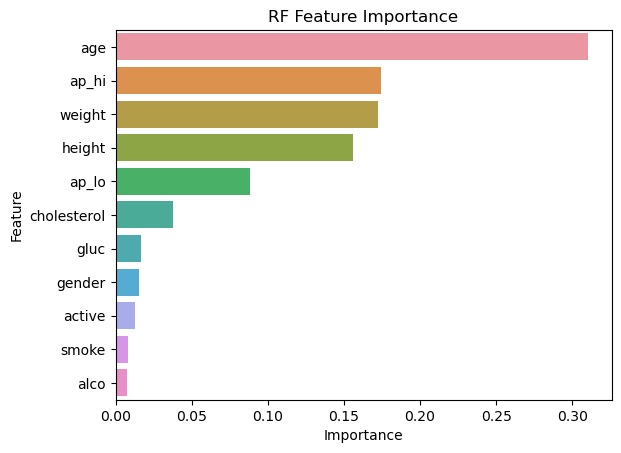

In [45]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

# Predictions and performance
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')

# Feature importances from the Random Forest model
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

print(feature_importance_rf)

# Visualizing feature importance
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_rf)

# Title
plt.title("RF Feature Importance")

# Save the plot as an image
plt.savefig('rfc feature importance.png', dpi = 300)

plt.show()

The Random Forest model performed slightly better but still isn't performing exceptionally well. After this model, I tried SVM and KNN, but they yielded poor results, so I decided to stick with these two models. 

* Most Important Features: Age, Systolic blood pressure (ap_hi), and weight are the most important predictors of cardiovascular disease in this Random Forest model. These results align well with what you might expect, given that they are well-established risk factors for cardiovascular disease.
* Moderate Importance: Height, Diastolic blood pressure (ap_lo), and cholesterol also play notable roles in predicting cardio, but their importance is less than that of the top three.
* Less Important Features: Glucose, gender, physical activity, smoking, and alcohol intake contribute very little to the predictions, especially when compared to the top features. This suggests that their relationship with cardiovascular disease might be weaker or more complex (i.e., non-linear).